# Linear Regression Assignment

## Problem Statement:
A **bike-sharing system** is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

**Company Wants To Know**:

1.Which variables are significant in predicting the demand for shared bikes.

2.How well those variables describe the bike demands Based on various meteorological surveys and people's styles.

**Business Objective** :

1.Develop the model & find required variables which are significant the demand for shared bikes with the available independent variables.

2.It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.

In [1]:
# Importing required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Step 1: Reading and Understanding the Data

In [2]:
# Importing the data set

boom_bikes = pd.read_csv('day.csv',encoding="ISO-8859-1")
boom_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## 1.1 Data Inspection

In [8]:
boom_bikes.shape


(730, 16)

In [9]:
boom_bikes.size

11680

In [10]:
boom_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [11]:
boom_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [12]:
boom_bikes.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### Insights :

1.The dataframe consist 730 Rows & 30 Columns

2.The dataframe consist int, object & float datatype columns

## 1.2 Data Cleaning

#### 1.Renaming the columns

In [13]:
# Renaming the columns

boom_bikes.rename(columns={"yr":"year", "mnth":"month","hum":"humidity"}, inplace=True)

In [14]:
boom_bikes.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### 2. Dropping irrelavant Columns

In [15]:
# Dropping "instant" column, it contains only index values 
boom_bikes.drop(["instant"], axis=1, inplace=True)


In [16]:
# Dropping "casual" & "registered" columns, as our target variable is "cnt"
boom_bikes.drop(["casual", "registered"], axis=1, inplace=True)

In [17]:
# Dropping "dteday" column as we have "yr" & "month" column
boom_bikes.drop(["dteday"], axis=1, inplace=True)

In [18]:
boom_bikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [19]:
boom_bikes.shape

(730, 12)

#### 3.Mapping the Columns

In [20]:
# Mapping the season column

boom_bikes.season = boom_bikes.season.replace({1:"spring",2:"summer",3:"fall",4:"winter"})

In [21]:
# Mapping the month column

boom_bikes.month = boom_bikes.month.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

In [22]:
# Mapping the weekday column

boom_bikes.weekday = boom_bikes.weekday.replace({0:"sun",1:"mon",2:"tue",3:"wed",4:"thu",5:"fri",6:"sat"})

In [23]:
# Mapping the weathersit column

boom_bikes.weathersit = boom_bikes.weathersit.replace({1:"Clear",2:"Misty",3:"Light_Snowrain",4:"Heavy_Snowrain"})

In [24]:
boom_bikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [25]:
boom_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


#### 4.Checking Null Values

In [26]:
boom_bikes.isnull().sum()

season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
cnt           0
dtype: int64

#### 5. checking outliers

In [27]:
boom_bikes.nunique()

season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
humidity      594
windspeed     649
cnt           695
dtype: int64

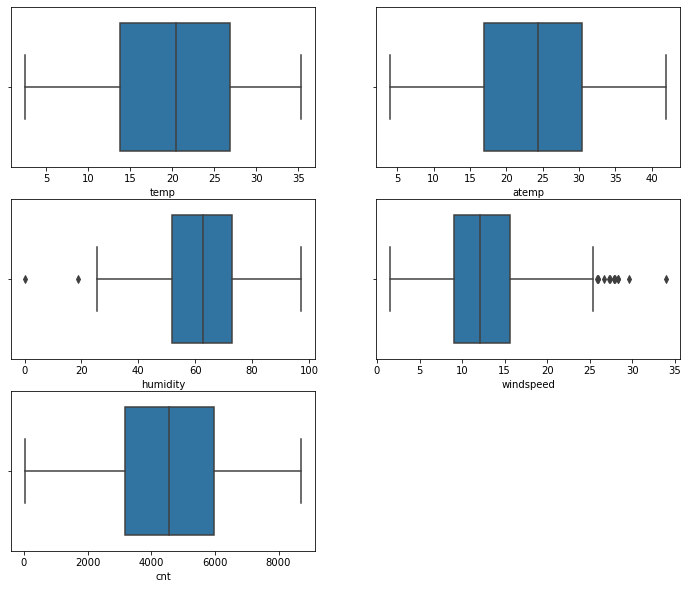

In [28]:
plt.figure(figsize=[12,10])
plt.subplot(3,2,1)
sns.boxplot(boom_bikes["temp"])
plt.subplot(3,2,2)
sns.boxplot(boom_bikes["atemp"])
plt.subplot(3,2,3)
sns.boxplot(boom_bikes["humidity"])
plt.subplot(3,2,4)
sns.boxplot(boom_bikes["windspeed"])
plt.subplot(3,2,5)
sns.boxplot(boom_bikes["cnt"])
plt.show()

### Insights :
1.The dataframe has no null values

2.The numerical variables in the dataset have no outliers

# Step 2: Data Visualisation

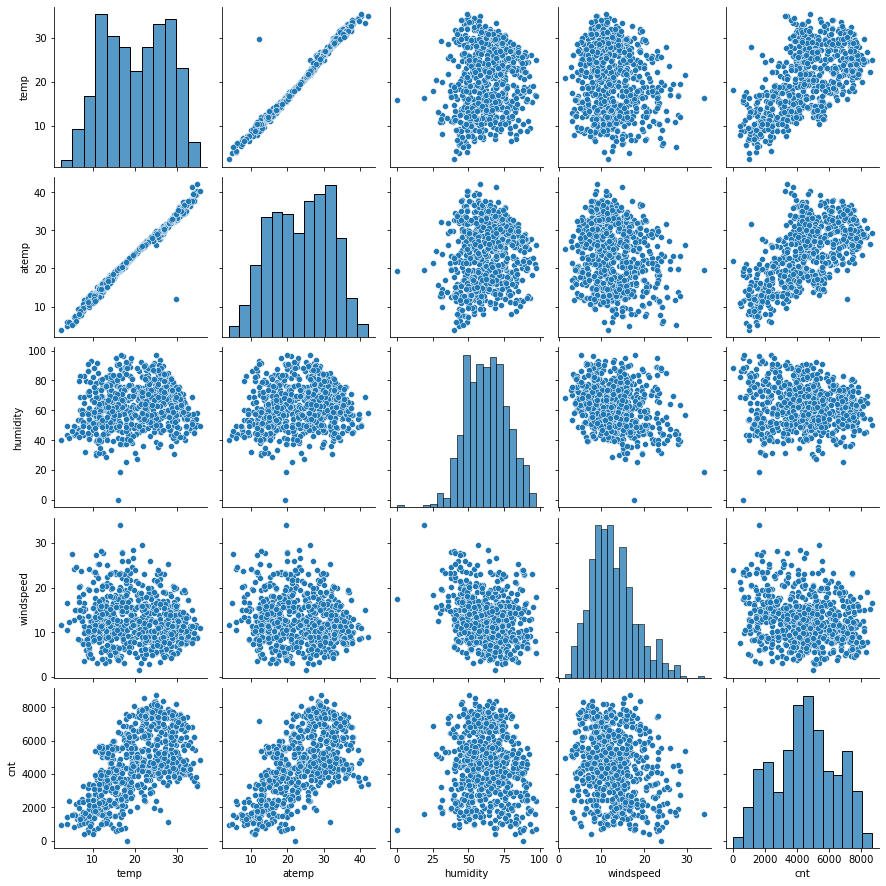

In [29]:
# Visualising the numerical variables

sns.pairplot(boom_bikes, vars=["temp", "atemp", "humidity", "windspeed", "cnt"])
plt.show()

Insights :

1.We found that there is linear relationship between "temp" & "atemp" variables

2.Above pairplot shows that there is Positive linear trend between "temp-cnt" & "atemp-cnt"

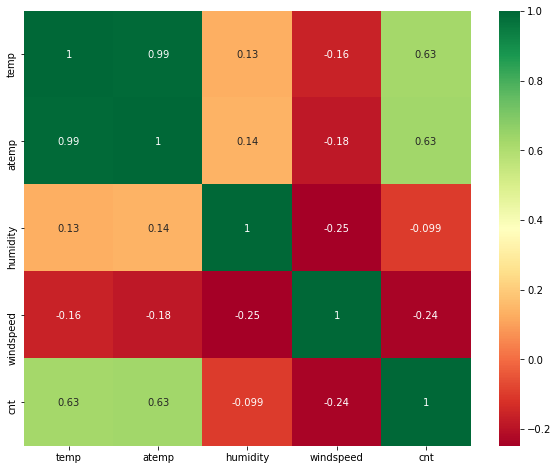

In [30]:
# Checking the correlation between the numerical variables

plt.figure(figsize=[10,8])
sns.heatmap(boom_bikes[["temp","atemp","humidity","windspeed","cnt"]].corr(), annot = True, cmap= "RdYlGn")
plt.show()

Insights:

1.Above heatmap show that there is linear relationship between "temp" and "atemp"

2.There is a correlation of 0.99 between the variables "temp" and "atemp"

3.Correlation of 0.63 between "cnt-temp" and "cnt-atemp"

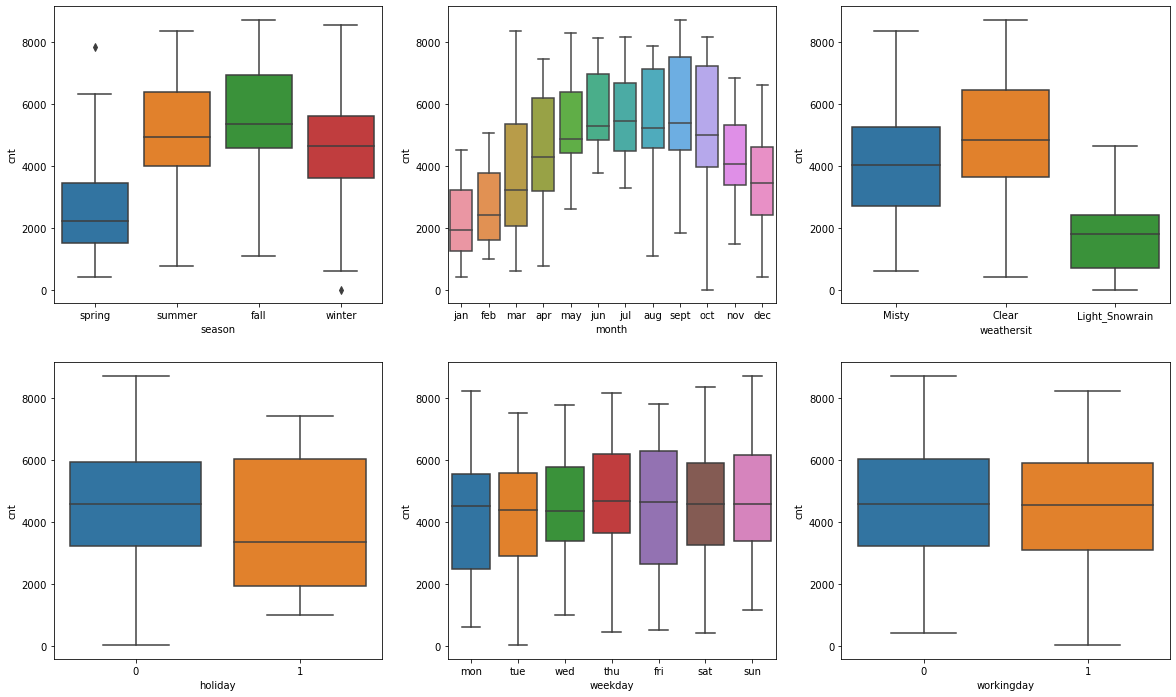

In [31]:
# Visualising the categorical variables

plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x="season", y="cnt", data=boom_bikes)
plt.subplot(2,3,2)
sns.boxplot(x="month", y="cnt", data=boom_bikes)
plt.subplot(2,3,3)
sns.boxplot(x="weathersit", y="cnt", data=boom_bikes)
plt.subplot(2,3,4)
sns.boxplot(x="holiday", y="cnt", data=boom_bikes)
plt.subplot(2,3,5)
sns.boxplot(x="weekday", y="cnt", data=boom_bikes)
plt.subplot(2,3,6)
sns.boxplot(x="workingday", y="cnt", data=boom_bikes)
plt.show()


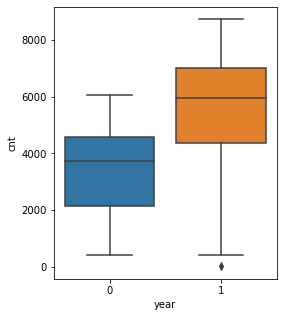

In [32]:
plt.figure(figsize=(4,5))
sns.boxplot(x= "year", y="cnt", data=boom_bikes)
plt.show()

### Insights :
1.season: Above boxplot shows that Bulk of bike booking happening in Season 2 and Season 3 with median of over 5000 bike booking.

2.mnth: Most of the bike booking happening in the months of 5,6,7,8,9,10 with a median of over 4000 bike bookings.

3.weathersit: weathersit1 showing most of the bike booking with a median over 5000 followed by weathersit2.

4.holiday: Large bike booking happening when it is not a holiday.

5.weekday: weekday variable showing almost similar kind of trend for bike booking with a median between 4000 to 5000 bookings.

6.workingday: Bike booking seeming to be same for wokingday or non-working day.

7.yr: Boxplot shows better bike bookings happening in year 2019 than previous year 2018.

# Step 3: Data Preparation

- Encoding:
    
    a.Converting binary vars to 1/0
    
    b.Other categorical vars to dummy vars
    

- Splitting into train and test

- Rescaling of variable



In [33]:
boom_bikes.month.value_counts()

mar     62
oct     62
jul     62
may     62
jan     62
aug     62
dec     62
jun     60
apr     60
sept    60
nov     60
feb     56
Name: month, dtype: int64

In [34]:
boom_bikes.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [35]:
boom_bikes.weekday.value_counts()

tue    105
mon    105
sat    104
sun    104
fri    104
wed    104
thu    104
Name: weekday, dtype: int64

In [36]:
boom_bikes.weathersit.value_counts()

Clear             463
Misty             246
Light_Snowrain     21
Name: weathersit, dtype: int64

In [37]:
# Converting data type of the variable to object data type

boom_bikes["season"] = boom_bikes["season"].astype("category")
boom_bikes["weathersit"] = boom_bikes["weathersit"].astype("category")
boom_bikes["weekday"] = boom_bikes["weekday"].astype("category")
boom_bikes["month"] = boom_bikes["month"].astype("category")

In [36]:
boom_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   year        730 non-null    int64   
 2   month       730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   humidity    730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


### 3.1 Creating dummy variables

In [38]:
# Creating dummy variables for following 4 variables


boom_bikes_month = pd.get_dummies(boom_bikes.month,drop_first=True)
boom_bikes_weekday = pd.get_dummies(boom_bikes.weekday,drop_first=True)
boom_bikes_weathersit = pd.get_dummies(boom_bikes.weathersit,drop_first=True)
boom_bikes_season = pd.get_dummies(boom_bikes.season,drop_first=True)

In [39]:
boom_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   year        730 non-null    int64   
 2   month       730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   humidity    730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [40]:
boom_bikes.shape

(730, 12)

In [41]:
boom_bikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [42]:
# Merging the dataframe with the dummy variable dataset

boom_bikes_new = pd.concat([boom_bikes,boom_bikes_month,boom_bikes_weekday,boom_bikes_weathersit,boom_bikes_season], axis=1)

In [43]:
boom_bikes_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_Snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,1,1,0,0
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,1,0,0
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,1,0,0
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [44]:
boom_bikes_new.shape

(730, 34)

In [45]:
boom_bikes_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   season          730 non-null    category
 1   year            730 non-null    int64   
 2   month           730 non-null    category
 3   holiday         730 non-null    int64   
 4   weekday         730 non-null    category
 5   workingday      730 non-null    int64   
 6   weathersit      730 non-null    category
 7   temp            730 non-null    float64 
 8   atemp           730 non-null    float64 
 9   humidity        730 non-null    float64 
 10  windspeed       730 non-null    float64 
 11  cnt             730 non-null    int64   
 12  aug             730 non-null    uint8   
 13  dec             730 non-null    uint8   
 14  feb             730 non-null    uint8   
 15  jan             730 non-null    uint8   
 16  jul             730 non-null    uint8   
 17  jun             

In [46]:
# Dropping the unnecessary columns as we have created dummy variable

boom_bikes_new.drop(["month", "season","weekday","weathersit"],axis=1, inplace=True)

In [47]:
boom_bikes_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_Snowrain,Misty,spring,summer,winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


In [48]:
boom_bikes_new.shape

(730, 30)

In [49]:
boom_bikes_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    uint8  
 9   dec             730 non-null    uint8  
 10  feb             730 non-null    uint8  
 11  jan             730 non-null    uint8  
 12  jul             730 non-null    uint8  
 13  jun             730 non-null    uint8  
 14  mar             730 non-null    uint8  
 15  may             730 non-null    uint8  
 16  nov             730 non-null    uint8  
 17  oct             730 non-null    uin

### 3.2 Splitting the Data into Train & Test sets

In [50]:
# Importing the required sklearn package for data split
from sklearn.model_selection import train_test_split


In [51]:
np.random.seed(0)
boom_bikes_train, boom_bikes_test = train_test_split(boom_bikes_new, train_size=0.7, random_state=100)
print(boom_bikes_train.shape)
print(boom_bikes_test.shape)


(510, 30)
(220, 30)


In [52]:
boom_bikes_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_Snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,0,1,0,0,0,0,1,0,1,0
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,1,0,0,0,0,1,0,1,0


In [53]:
boom_bikes_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            510 non-null    int64  
 1   holiday         510 non-null    int64  
 2   workingday      510 non-null    int64  
 3   temp            510 non-null    float64
 4   atemp           510 non-null    float64
 5   humidity        510 non-null    float64
 6   windspeed       510 non-null    float64
 7   cnt             510 non-null    int64  
 8   aug             510 non-null    uint8  
 9   dec             510 non-null    uint8  
 10  feb             510 non-null    uint8  
 11  jan             510 non-null    uint8  
 12  jul             510 non-null    uint8  
 13  jun             510 non-null    uint8  
 14  mar             510 non-null    uint8  
 15  may             510 non-null    uint8  
 16  nov             510 non-null    uint8  
 17  oct             510 non-null    u

In [54]:
boom_bikes_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_Snowrain,Misty,spring,summer,winter
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,1,0,1,0,0,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,0,...,0,0,1,0,0,0,0,0,1,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,1,0,0,0,0,0,1,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,0,0,...,1,0,0,0,0,0,0,0,1,0


In [55]:
boom_bikes_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            220 non-null    int64  
 1   holiday         220 non-null    int64  
 2   workingday      220 non-null    int64  
 3   temp            220 non-null    float64
 4   atemp           220 non-null    float64
 5   humidity        220 non-null    float64
 6   windspeed       220 non-null    float64
 7   cnt             220 non-null    int64  
 8   aug             220 non-null    uint8  
 9   dec             220 non-null    uint8  
 10  feb             220 non-null    uint8  
 11  jan             220 non-null    uint8  
 12  jul             220 non-null    uint8  
 13  jun             220 non-null    uint8  
 14  mar             220 non-null    uint8  
 15  may             220 non-null    uint8  
 16  nov             220 non-null    uint8  
 17  oct             220 non-null    u

### 3.3 Rescaling the Features

**Min-Max scaling (normalisation) Between 0 and 1**

**Standardisation (mean-0, sigma-1)**

In [56]:
# Importing MinMAXScaler 

from sklearn.preprocessing import MinMaxScaler

In [57]:
# 1. Instantiate an object
scaler = MinMaxScaler()

# Create a list of numeric vars
num_vars = ["temp", "atemp", "humidity", "windspeed", "cnt"]

# 2. Fit on the data
boom_bikes_train[num_vars] = scaler.fit_transform(boom_bikes_train[num_vars])


In [58]:
boom_bikes_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_Snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,1,0,0,0,0,1,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,1,0,0,0,0,1,0,1,0


In [59]:
boom_bikes_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_Snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


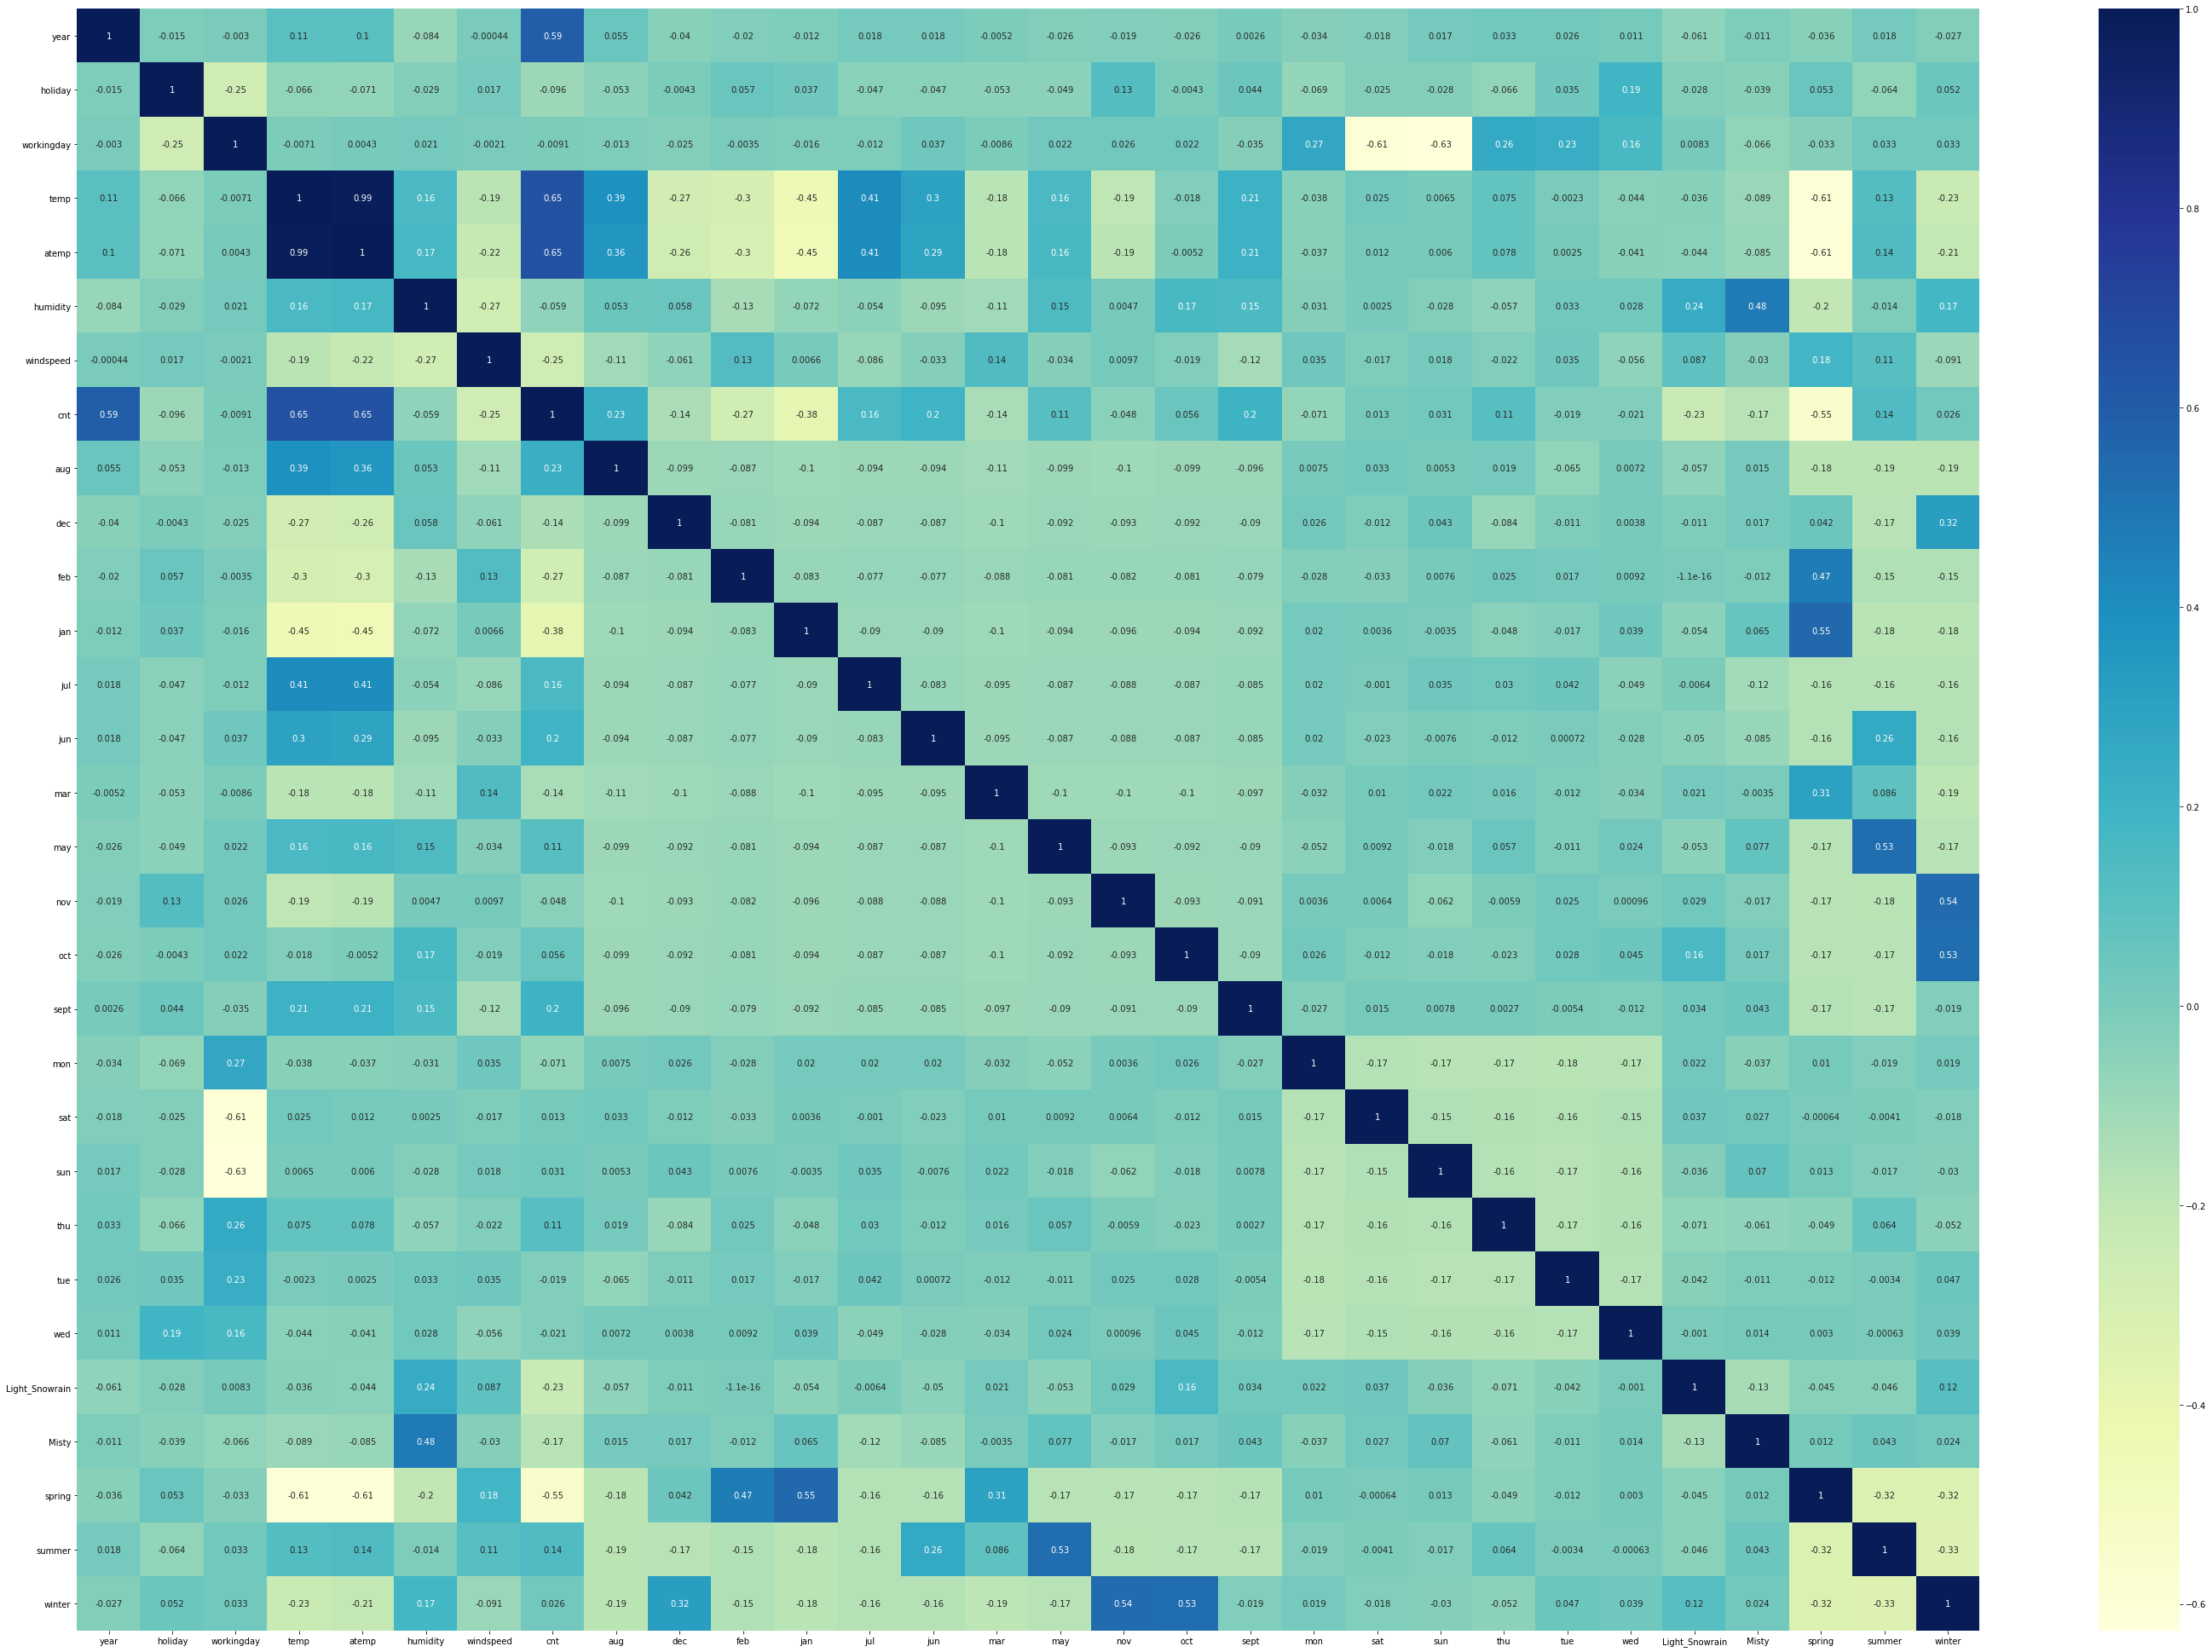

In [60]:
# Checking Correlation between the variables

plt.figure(figsize = (50,35))
sns.heatmap(boom_bikes_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

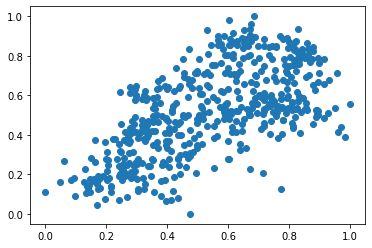

In [61]:
# Checking one of the variable correlation to observe the trend

plt.figure()
plt.scatter(boom_bikes_train.temp,boom_bikes_train.cnt)
plt.show()

**Insights**:

Above scatter plot shows that there is a positive correlation between temp and cnt

### 3.4 Dividing the Data into X & y sets

In [62]:
# y set contain only target variable
y_train = boom_bikes_train.pop('cnt')

# X set contain remaining all variable (independent variables)
X_train = boom_bikes_train


In [63]:
y_train.shape

(510,)

In [64]:
X_train.shape

(510, 29)

# Step 4: Training the Model

### RFE & Statsmodel methods for Optimun model

In [65]:
# Importing RFE & LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [66]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [67]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 12),
 ('mar', False, 15),
 ('may', False, 9),
 ('nov', True, 1),
 ('oct', False, 13),
 ('sept', True, 1),
 ('mon', False, 8),
 ('sat', False, 5),
 ('sun', False, 6),
 ('thu', False, 14),
 ('tue', False, 7),
 ('wed', False, 11),
 ('Light_Snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [68]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'dec', 'jan', 'jul',
       'nov', 'sept', 'Light_Snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [69]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'jun', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

### Building model using statsmodel for the detailed statistics 

### Model 1:

In [70]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
import statsmodels.api as sm  
X_train_sm1 = sm.add_constant(X_train_rfe)

# Running the linear model
lr1 = sm.OLS(y_train, X_train_sm1).fit()

#Let's see the summary of our linear model
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sat, 02 Jul 2022   Prob (F-statistic):          8.15e-189
Time:                        12:16:22   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3197      0.036      8.

In [71]:
X_train_rfe.columns

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'dec', 'jan', 'jul',
       'nov', 'sept', 'Light_Snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [72]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"] = X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
3,humidity,30.89
2,temp,17.79
4,windspeed,4.72
12,spring,4.37
14,winter,4.06
13,summer,2.82
11,Misty,2.32
0,year,2.09
8,nov,1.85
6,jan,1.75


Insights :

1.Dropping variable "humidity" as it has high VIF value

2.Keeping "temp" variable as it could be an important factor for analysis

### Model 2:

In [73]:
X_train_new = X_train_rfe.drop(["humidity"], axis = 1)

In [74]:
# Adding a constant variable 

X_train_sm2 = sm.add_constant(X_train_new)

# Running the linear model

lr2 = sm.OLS(y_train, X_train_sm2).fit()

#Let's see the summary of our linear model

print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Sat, 02 Jul 2022   Prob (F-statistic):          4.75e-186
Time:                        12:16:35   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2450      0.032      7.

In [75]:
X_train_new.columns

Index(['year', 'holiday', 'temp', 'windspeed', 'dec', 'jan', 'jul', 'nov',
       'sept', 'Light_Snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [76]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"] = X_train_new.columns
vif["VIF"] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
13,winter,2.95
11,spring,2.89
12,summer,2.24
0,year,2.07
7,nov,1.81
5,jan,1.66
6,jul,1.59
10,Misty,1.57


Dropping variable "nov" as it has high p-value

### Model 3:

In [77]:
X_train_new = X_train_new.drop(["nov"], axis = 1)

In [78]:
# Adding a constant variable 

X_train_sm3 = sm.add_constant(X_train_new)

# Running the linear model

lr3 = sm.OLS(y_train, X_train_sm3).fit()

#Let's see the summary of our linear model

print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Sat, 02 Jul 2022   Prob (F-statistic):          2.74e-186
Time:                        12:16:51   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2283      0.031      7.

In [79]:
X_train_new.columns

Index(['year', 'holiday', 'temp', 'windspeed', 'dec', 'jan', 'jul', 'sept',
       'Light_Snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [80]:
#Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"] = X_train_new.columns
vif["VIF"] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
2,temp,5.14
3,windspeed,4.62
10,spring,2.89
11,summer,2.24
0,year,2.07
12,winter,2.05
5,jan,1.65
6,jul,1.59
9,Misty,1.57
7,sept,1.34


**Dropping variable "dec" as it has high p-value**

### Model 4:

In [81]:
X_train_new = X_train_new.drop(["dec"], axis=1)

In [82]:
# Adding a constant variable 

X_train_sm4 = sm.add_constant(X_train_new)

# Running the linear model

lr4 = sm.OLS(y_train, X_train_sm4).fit()

#Let's see the summary of our linear model

print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Sat, 02 Jul 2022   Prob (F-statistic):          8.14e-187
Time:                        12:17:01   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2154      0.030      7.

In [83]:
X_train_new.columns

Index(['year', 'holiday', 'temp', 'windspeed', 'jan', 'jul', 'sept',
       'Light_Snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [84]:
#Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"] = X_train_new.columns
vif["VIF"] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
2,temp,5.13
3,windspeed,4.62
9,spring,2.75
10,summer,2.24
0,year,2.07
11,winter,1.78
4,jan,1.61
5,jul,1.59
8,Misty,1.56
6,sept,1.34


**Dropping variable "jan" as it has high p-value**

### Model 5:

In [85]:
X_train_new = X_train_new.drop(["jan"], axis=1)

In [86]:
# Adding a constant variable 

X_train_sm5 = sm.add_constant(X_train_new)

# Running the linear model

lr5 = sm.OLS(y_train, X_train_sm5).fit()

#Let's see the summary of our linear model

print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Sat, 02 Jul 2022   Prob (F-statistic):          5.06e-187
Time:                        12:17:15   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1994      0.030      6.

In [87]:
X_train_new.columns

Index(['year', 'holiday', 'temp', 'windspeed', 'jul', 'sept', 'Light_Snowrain',
       'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [88]:
#Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"] = X_train_new.columns
vif["VIF"] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
9,summer,2.23
8,spring,2.08
0,year,2.07
10,winter,1.78
4,jul,1.58
7,Misty,1.55
5,sept,1.34
6,Light_Snowrain,1.08


**Dropping the variable "jul" as it has high p-value**

### Model 6:

In [89]:
# dropping the variable jul
X_train_new = X_train_new.drop(["jul"], axis=1)

In [90]:
# Adding a constant variable 

X_train_sm6 = sm.add_constant(X_train_new)

# Running the linear model

lr6 = sm.OLS(y_train, X_train_sm6).fit()

#Let's see the summary of our linear model

print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Sat, 02 Jul 2022   Prob (F-statistic):          1.47e-186
Time:                        12:17:24   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1909      0.030      6.

In [91]:
X_train_new.columns

Index(['year', 'holiday', 'temp', 'windspeed', 'sept', 'Light_Snowrain',
       'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [92]:
#Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"] = X_train_new.columns
vif["VIF"] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
7,spring,1.99
8,summer,1.90
9,winter,1.63
6,Misty,1.55
4,sept,1.23
5,Light_Snowrain,1.08
1,holiday,1.04


In [93]:
X_train_new.columns

Index(['year', 'holiday', 'temp', 'windspeed', 'sept', 'Light_Snowrain',
       'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [94]:
lr6.params

const             0.190855
year              0.234132
holiday          -0.096316
temp              0.477737
windspeed        -0.148098
sept              0.090998
Light_Snowrain   -0.285031
Misty            -0.078741
spring           -0.055406
summer            0.062076
winter            0.094476
dtype: float64

Insights :

1.The Model 6 has significant p-values (0.00).
    
2.The multicollinearity between the predictor variables is also low i.e VIF value <5.

3.The R-squared and Adjusted R-squared values are almost same (83.3% & 82.9% resp.)

4.The Model 6 has high F-statistics value = 271.9 (which is > 1)

5.Also p(F-statisitcs) = 2.83e-186 value which is almost 0

6.Model 6 has all required values under significant range.

7.We took this model 6 for further analysis as final optimum model

# Step 5: Residual Analysis 

In [95]:
X_train_sm6.head()

,const,year,holiday,temp,windspeed,sept,Light_Snowrain,Misty,spring,summer,winter
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,1,0,1,0
111,1.0,0,0,0.345824,0.380981,0,0,1,0,1,0


In [96]:
y_train_pred = lr6.predict(X_train_sm6)

### 5.1 Checking normal distribution of residuals

In [97]:
res = y_train - y_train_pred

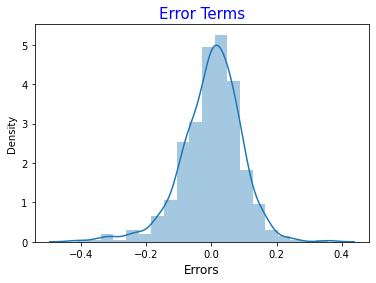

In [98]:
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
plt.title("Error Terms", fontsize=15, color= "blue")
plt.xlabel("Errors", fontsize=12)
plt.show()


Insights:

1.Above distribution plot clearly shows that, residuals are normally distributed with mean 0.

2.Linear regression assumption is valid.

### 5.2 Multicolinearity

In [99]:
# Checking multicollinearity
vif

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
7,spring,1.99
8,summer,1.90
9,winter,1.63
6,Misty,1.55
4,sept,1.23
5,Light_Snowrain,1.08
1,holiday,1.04


Insights :

VIF values of all the variables are less than 5.

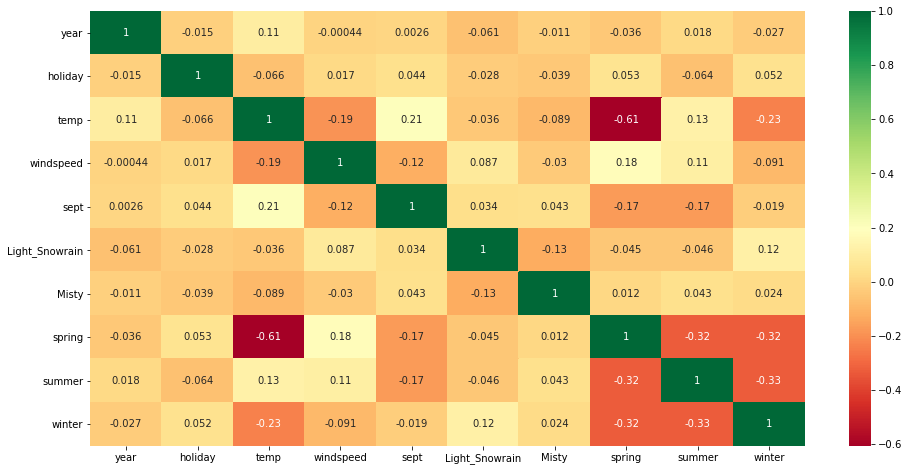

In [100]:
plt.figure(figsize=[16,8])
sns.heatmap(X_train_new.corr(), annot=True, cmap= "RdYlGn")
plt.show()

Insights:

1.All VIF values of the predictor variables are less than 5

2.No multicolinearity between the variables

### 5.3 Linear relationship validation

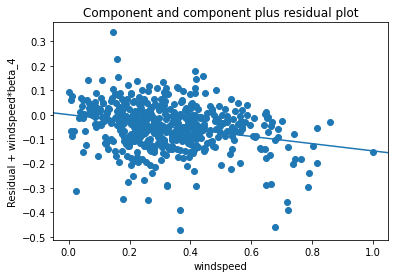

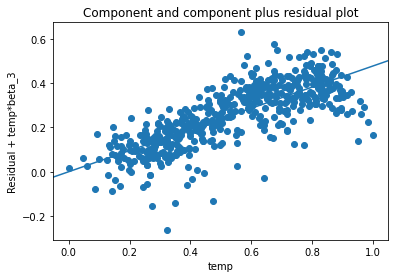

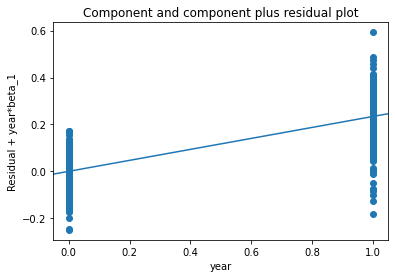

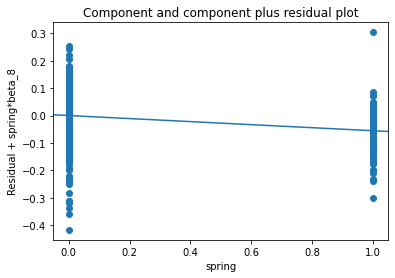

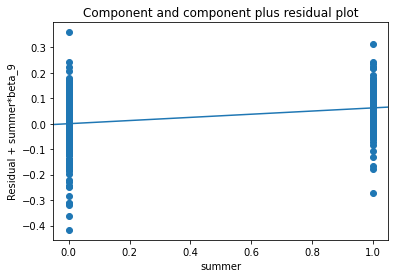

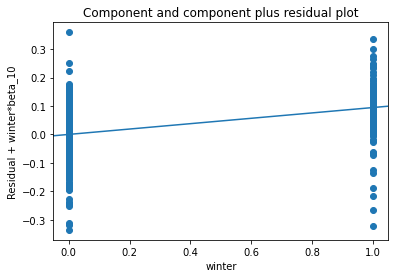

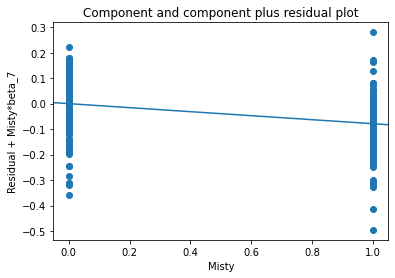

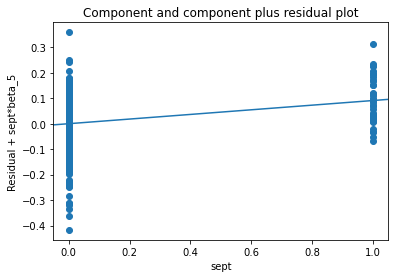

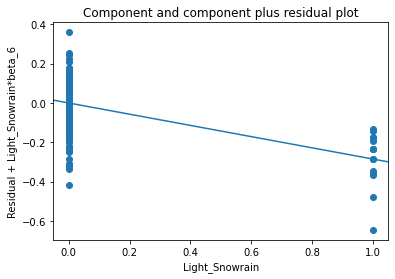

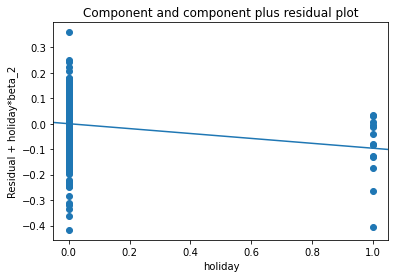

In [101]:
# Checking linear relationship validation using CCPR plot

sm.graphics.plot_ccpr(lr6, "windspeed")
plt.show()
sm.graphics.plot_ccpr(lr6, "temp")
plt.show()
sm.graphics.plot_ccpr(lr6, "year")
plt.show()
sm.graphics.plot_ccpr(lr6, "spring")
plt.show()
sm.graphics.plot_ccpr(lr6, "summer")
plt.show()
sm.graphics.plot_ccpr(lr6, "winter")
plt.show()
sm.graphics.plot_ccpr(lr6, "Misty")
plt.show()
sm.graphics.plot_ccpr(lr6, "sept")
plt.show()
sm.graphics.plot_ccpr(lr6, "Light_Snowrain")
plt.show()
sm.graphics.plot_ccpr(lr6, "holiday")
plt.show()

Insights :

The above scatter plots shows linear relationship between the variables.

### 5.4 Homoscedasticity

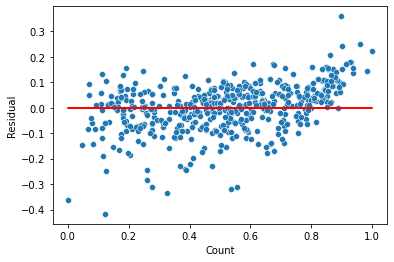

In [102]:
# Checking Homoscedasticity

y_train_pred = lr6.predict(X_train_sm6)
res = y_train - y_train_pred
sns.scatterplot(y_train, res)
plt.plot(y_train, (y_train-y_train), "-r")
plt.xlabel("Count")
plt.ylabel("Residual")
plt.show()

Insights :

Above scatter plot shows that there is No visible pattern for residuals

# Step 6: Making Predictions On Final Model

###  6.1 Applying the scaling on the test sets

In [103]:
num_vars = ["temp", "atemp", "humidity", "windspeed", "cnt"]
boom_bikes_test[num_vars] = scaler.transform(boom_bikes_test[num_vars])

In [104]:
boom_bikes_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_Snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,1,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,1,0,0,0,0,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,1,0,0,0,0,0,0,0,1,0


In [105]:
boom_bikes_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_Snowrain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 6.2 Dividing into X_test & y_test

In [106]:
y_test = boom_bikes_test.pop("cnt")
X_test = boom_bikes_test

In [107]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            220 non-null    int64  
 1   holiday         220 non-null    int64  
 2   workingday      220 non-null    int64  
 3   temp            220 non-null    float64
 4   atemp           220 non-null    float64
 5   humidity        220 non-null    float64
 6   windspeed       220 non-null    float64
 7   aug             220 non-null    uint8  
 8   dec             220 non-null    uint8  
 9   feb             220 non-null    uint8  
 10  jan             220 non-null    uint8  
 11  jul             220 non-null    uint8  
 12  jun             220 non-null    uint8  
 13  mar             220 non-null    uint8  
 14  may             220 non-null    uint8  
 15  nov             220 non-null    uint8  
 16  oct             220 non-null    uint8  
 17  sept            220 non-null    u

In [108]:
y_test

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
702    0.757478
127    0.495973
640    0.868615
72     0.232858
653    0.864243
Name: cnt, Length: 220, dtype: float64

In [109]:
# Now let's use our final model to make predictions

# Creating X_test_new dataframe variables from X_test
col1 = X_train_new.columns
X_test = X_test[col1]

# Adding a constant variable
X_test_sm6 = sm.add_constant(X_test)
X_test_sm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           220 non-null    float64
 1   year            220 non-null    int64  
 2   holiday         220 non-null    int64  
 3   temp            220 non-null    float64
 4   windspeed       220 non-null    float64
 5   sept            220 non-null    uint8  
 6   Light_Snowrain  220 non-null    uint8  
 7   Misty           220 non-null    uint8  
 8   spring          220 non-null    uint8  
 9   summer          220 non-null    uint8  
 10  winter          220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.6 KB


In [110]:
y_pred = lr6.predict(X_test_sm6)

In [111]:
# Making predictions
y_test_pred = lr6.predict(X_test_sm6)

In [112]:
r2 = r2_score(y_test, y_pred)
r2

0.8038195990728842

# Step 7: Model Evaluation

###  7.1 Plotting y_test and y_pred to understand the spread

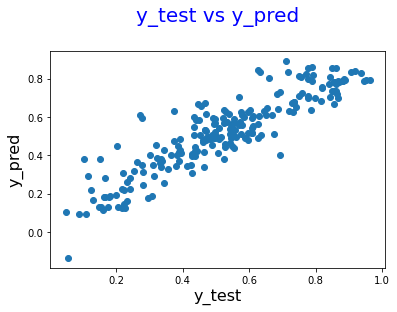

In [113]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
plt.title("y_test vs y_pred\n", fontsize = 20, color = "blue")
plt.xlabel("y_test", fontsize= 16)
plt.ylabel("y_pred", fontsize=16)
plt.show()

### 7.2 R2 & Adjusted R2 Value: Test Data Set

In [114]:
# Importing the required library
from sklearn.metrics import r2_score

In [115]:
# Calculating r2 score

r2 = r2_score(y_test, y_pred)
r2

0.8038195990728842

In [116]:
# Calculating Adj.r2 score

X_test.shape

(220, 10)

In [117]:
# n is the number of rows in X

n = X_test.shape[0]

# p is the number of features (predictors)
p = X_test.shape[1]

# Adjusted R-Squared value

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7944329770189553

### 7.3 Predictor Variables

- year
- hoilday
- temp
- windspeed
- sept
- Light_Snowrain
- Misty
- spring
- summer
- winter

### 7.4 Regression Plot

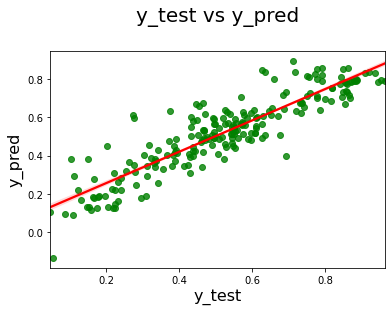

In [118]:
# Plotting a regression plot

fig = plt.figure()
sns.regplot(x= y_test, y=y_pred, ci=70, fit_reg=True, scatter_kws={"color":"green" }, line_kws={"color": "red"})
plt.title("y_test vs y_pred\n", fontsize = 20)
plt.xlabel("y_test", fontsize= 16)
plt.ylabel("y_pred", fontsize=16)
plt.show()

### 7.5 Final Model Equation

**cnt = 0.1909 + (0.2341 x year) - (0.0963 x holiday) + (0.4777 x temp) - (0.1482 x windspeed) + (0.0909 x sept) - (0.2850 x Light_Snowrain) - (0.0787 x Misty) - (0.0554 x spring) + (0.0620 x summer) + (0.0944 x winter)**

### 7.6 Train Data Set Values

- R2 = 0.83
- Adj. R2 = 0.82

### 7.7 Test Data Set Values

- R2 = 0.80
- Adj. R2 = 0.79

In [126]:
lr6.params

const             0.190855
year              0.234132
holiday          -0.096316
temp              0.477737
windspeed        -0.148098
sept              0.090998
Light_Snowrain   -0.285031
Misty            -0.078741
spring           -0.055406
summer            0.062076
winter            0.094476
dtype: float64

### Insights :

**Bike Demand Increases**
- A coefficient value of "0.477737" indicates that a unit increase in "temp" variable increases the bike demand by 0.477737 units.
- A coefficient value of "0.234132" indicates that a unit increase in "year" variable increases the bike demand by 0.234132 units.
- A coefficient value of "0.090998" indicates that a unit increase in "sept" variable increases the bike demand by 0.090998 units.
- A coefficient value of "0.062076" indicates that a unit increase in "summer" variable increases the bike demand by 0.062076 units.
- A coefficient value of "0.094476" indicates that a unit increase in "winner" variable increases the bike demand by 0.094476 units.

**Bike Demand Decreases**

- A coefficient values of variables like holiday, windspeed, Light_Snowrain, Misty and spring indicates that a unit increase in these variable decreases the bike demand.